In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,77.0,1,0,Yes,Self-employed,Urban,124.13,31.4,never smoked,Yes
1,Female,38.0,0,0,Yes,Private,Rural,66.16,42.7,Unknown,No
2,Male,55.0,0,0,Yes,Private,Rural,232.81,28.8,Unknown,No
3,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,Yes
4,Female,80.0,0,1,Yes,Self-employed,Rural,66.72,21.7,formerly smoked,Yes


In [ ]:
df.shape

(9499, 11)

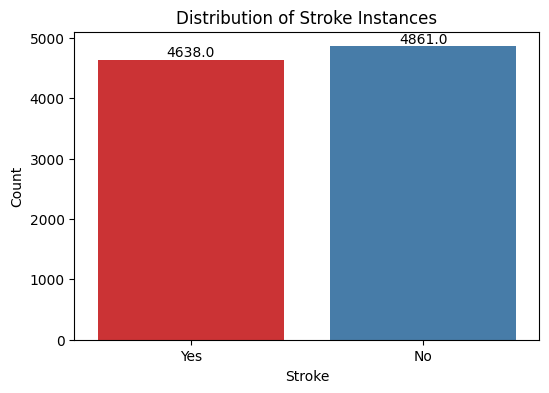

In [ ]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(data=df, x='stroke', palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Instances')
plt.show()

In [ ]:
nan_counts = df.isna().sum()
print(nan_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(9298, 11)

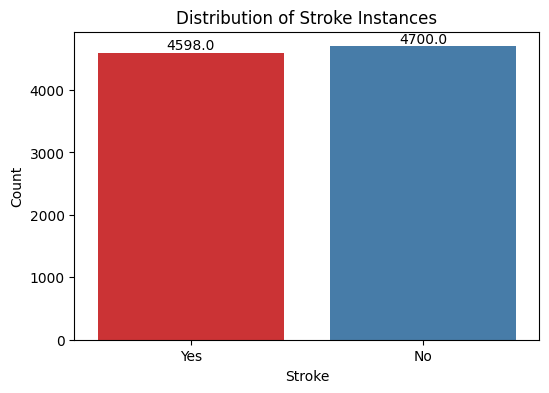

In [ ]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(data=df, x='stroke', palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Instances')
plt.show()


In [ ]:
def ReplaceOutliers(df):
    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        upperBound = q3 + (1.5 * IQR)
        lowerBound = q1 - (1.5 * IQR)
        df[col] = np.where(df[col] > upperBound, upperBound,
                           np.where(df[col] < lowerBound, lowerBound, df[col]))
    return df

In [ ]:
df=ReplaceOutliers(df)

In [ ]:
df.shape

(9298, 11)

In [ ]:
label_encoder = LabelEncoder()
df['stroke']=label_encoder.fit_transform(df['stroke'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['work_type']=label_encoder.fit_transform(df['work_type'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['ever_married']=label_encoder.fit_transform(df['ever_married'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
columns_to_scale = ['age','avg_glucose_level','bmi']
df[columns_to_scale]= sl.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.007394,1,0,1,3,1,0.095063,0.278763,2,1
1,0,-0.746108,0,0,1,2,0,-0.958314,1.944825,0,0
2,1,0.018239,0,0,1,2,0,2.069896,-0.104579,0,0
3,1,1.232202,0,1,1,2,0,1.624523,0.440946,0,1
4,0,1.142279,0,1,1,3,0,-0.948138,-1.151397,1,1


In [ ]:
X=df.drop('stroke',axis=1)
Y=df['stroke']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 65080
X_test- 27900
y_train- 6508
y_test- 2790


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy=[]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
x=XGBClassifier()
modelx=x.fit(X_train,y_train)
predx=modelx.predict(X_test)
cmx=confusion_matrix(y_test,predx)
cmx

array([[1355,   67],
       [   0, 1368]])

<Axes: >

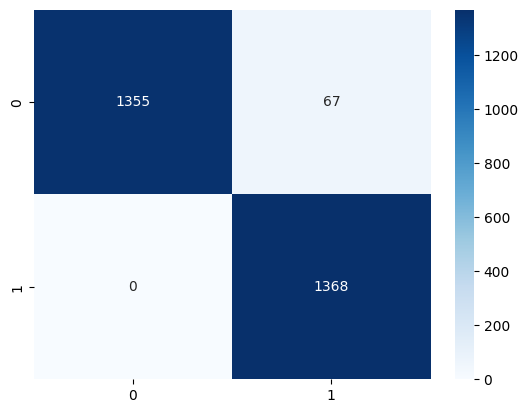

In [ ]:
sns.heatmap(cmx, annot=True, fmt='d', cmap='Blues')

In [ ]:
p= accuracy_score(y_test,predx)
p

0.9759856630824373

In [ ]:
accuracy.append(p)

In [ ]:
accuracy

[0.9759856630824373]

In [ ]:
print(classification_report(y_test, predx))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1422
           1       0.95      1.00      0.98      1368

    accuracy                           0.98      2790
   macro avg       0.98      0.98      0.98      2790
weighted avg       0.98      0.98      0.98      2790



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
x=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
modelx=x.fit(X_train, y_train)
predgx=modelx.predict(X_test)
cmgx=confusion_matrix(y_test,predgx)
cmgx

array([[1109,  313],
       [  99, 1269]])

<Axes: >

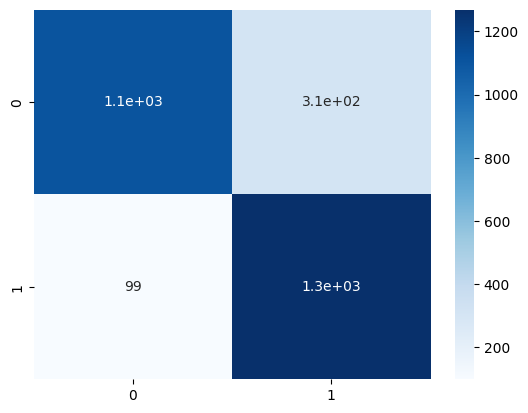

In [ ]:
sns.heatmap(cmgx, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test,predgx))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1422
           1       0.80      0.93      0.86      1368

    accuracy                           0.85      2790
   macro avg       0.86      0.85      0.85      2790
weighted avg       0.86      0.85      0.85      2790



In [ ]:
g= accuracy_score(y_test,predgx)
g

0.8523297491039427

In [ ]:
accuracy.append(g)

In [ ]:
accuracy

[0.9759856630824373, 0.8523297491039427]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth=10,n_estimators=100)
mrfc=rfc.fit(X_train,y_train)
pr=mrfc.predict(X_test)
cmat=confusion_matrix(y_test,pr)
cmat

array([[1271,  151],
       [   0, 1368]])

<Axes: >

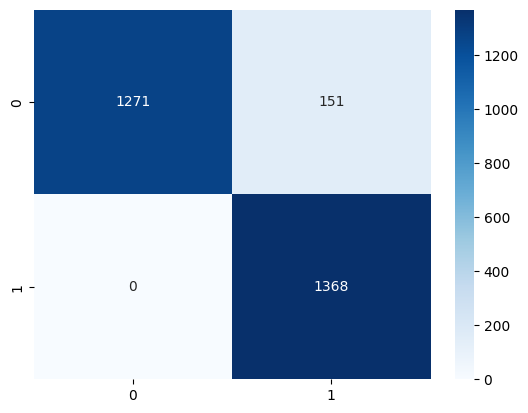

In [ ]:
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues')

In [ ]:
r = accuracy_score(y_test, pr)
r

0.9458781362007168

In [ ]:
accuracy.append(r)

In [ ]:
accuracy

[0.9759856630824373, 0.8523297491039427, 0.9458781362007168]

In [ ]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1422
           1       0.90      1.00      0.95      1368

    accuracy                           0.95      2790
   macro avg       0.95      0.95      0.95      2790
weighted avg       0.95      0.95      0.95      2790



# STACKING the models

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
base_models = [
    ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)),
    ('xgboost', XGBClassifier()),
    ('random_forest', RandomForestClassifier(max_depth=10, n_estimators=100))
]


meta_model = XGBClassifier()


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


stacking_model.fit(X_train,y_train)


stacking_predictions = stacking_model.predict(X_test)


classification_rep = classification_report(y_test, stacking_predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1422
           1       1.00      1.00      1.00      1368

    accuracy                           1.00      2790
   macro avg       1.00      1.00      1.00      2790
weighted avg       1.00      1.00      1.00      2790



In [ ]:
cst1= confusion_matrix(y_test, stacking_predictions)
cst1

array([[1421,    1],
       [   0, 1368]])

<Axes: >

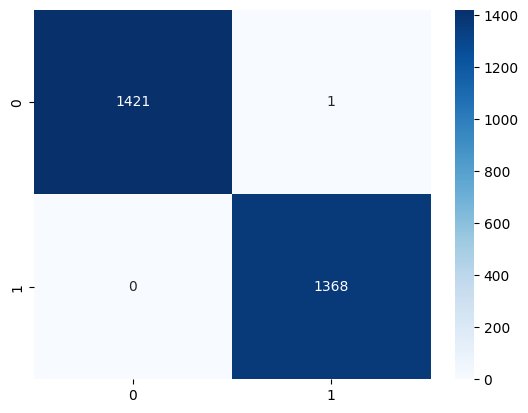

In [ ]:
sns.heatmap(cst1, annot=True, fmt='d', cmap='Blues')

In [ ]:
st= accuracy_score(y_test,stacking_predictions)
st

0.9996415770609319

In [ ]:
accuracy.append(st)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319]

In [ ]:
meta_model1 =  GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)


stacking_model1 = StackingClassifier(estimators=base_models, final_estimator=meta_model1)


stacking_model1.fit(X_train,y_train)


stacking_predictions1 = stacking_model1.predict(X_test)


classification_rep = classification_report(y_test, stacking_predictions1)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1422
           1       1.00      1.00      1.00      1368

    accuracy                           1.00      2790
   macro avg       1.00      1.00      1.00      2790
weighted avg       1.00      1.00      1.00      2790



In [ ]:
cst2= confusion_matrix(y_test, stacking_predictions1)
cst2

array([[1417,    5],
       [   3, 1365]])

<Axes: >

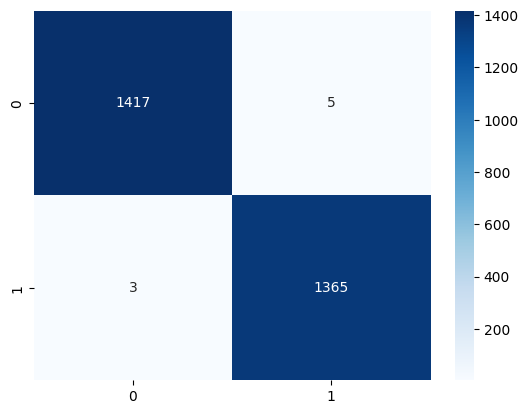

In [ ]:
sns.heatmap(cst2, annot=True, fmt='d', cmap='Blues')

In [ ]:
st2=accuracy_score(y_test, stacking_predictions1)
st2

0.9971326164874552

In [ ]:
accuracy.append(st2)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319,
 0.9971326164874552]

NEURAL NETWORKS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train,y_train, epochs=100, batch_size=32)

loss, neural_net_accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', neural_net_accuracy)

Epoch 1/100
204/204 [==============================] - 3s 2ms/step - loss: 0.4722 - accuracy: 0.7711
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8121
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8440
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8746
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8871
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9041
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9222
Epoch 8/100
204/204 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9247
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9341
Epoch 10/100
204/204 [==============================] - 0s 2ms/step - loss: 0.1550 - accura

In [ ]:
accuracy.append(neural_net_accuracy)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319,
 0.9971326164874552,
 0.9756272435188293]

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

88/88 [==============================] - 0s 1ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

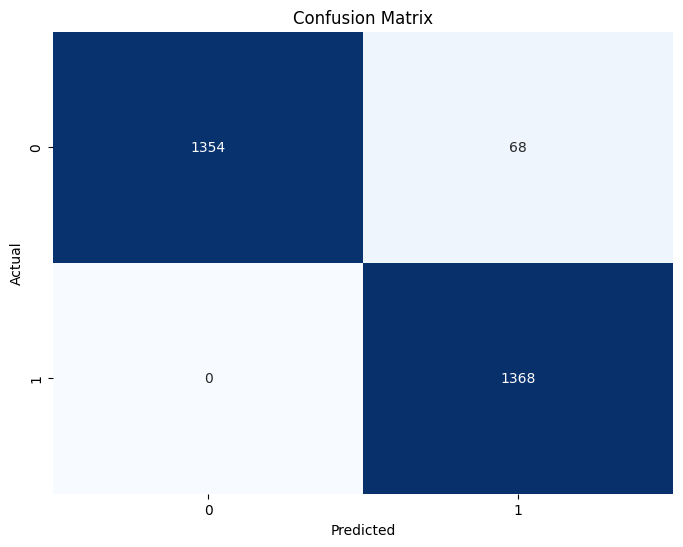

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1422
           1       0.95      1.00      0.98      1368

    accuracy                           0.98      2790
   macro avg       0.98      0.98      0.98      2790
weighted avg       0.98      0.98      0.98      2790



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model3=lr.fit(X_train, y_train)
predLR=model3.predict(X_test)

cmlr=confusion_matrix(y_test,predLR)

In [ ]:
cmlr

array([[1044,  378],
       [ 287, 1081]])

<Axes: >

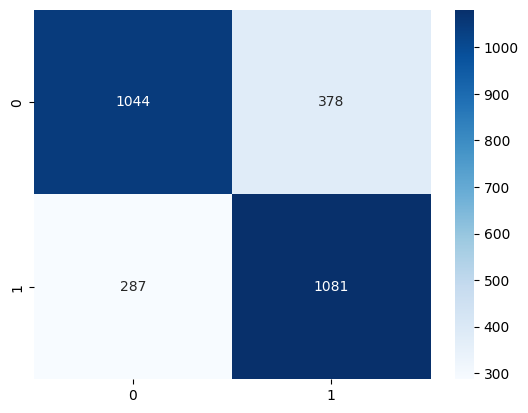

In [ ]:
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Blues')

In [ ]:
print(classification_report(y_test,predLR))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1422
           1       0.74      0.79      0.76      1368

    accuracy                           0.76      2790
   macro avg       0.76      0.76      0.76      2790
weighted avg       0.76      0.76      0.76      2790



In [ ]:
log_accuracy= accuracy_score(y_test,predLR)

In [ ]:
accuracy.append(log_accuracy)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319,
 0.9971326164874552,
 0.9756272435188293,
 0.7616487455197133]

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=1,kernel='linear',gamma='auto',probability=True,random_state=42)
modelSVC=svm.fit(X_train,y_train)
predictionSVC=modelSVC.predict(X_test)
cmSVC= confusion_matrix(y_test,predictionSVC)
cmSVC

array([[1036,  386],
       [ 279, 1089]])

In [ ]:
print(classification_report(y_test,predictionSVC))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1422
           1       0.74      0.80      0.77      1368

    accuracy                           0.76      2790
   macro avg       0.76      0.76      0.76      2790
weighted avg       0.76      0.76      0.76      2790



<Axes: >

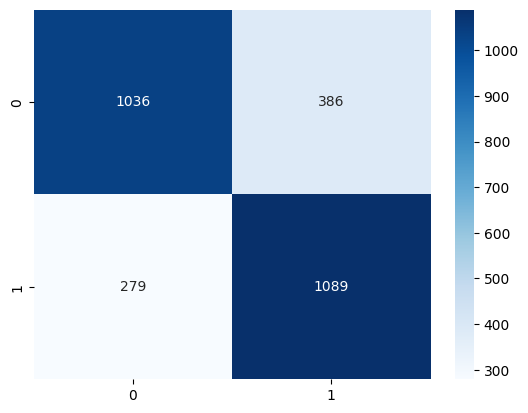

In [ ]:
sns.heatmap(cmSVC, annot=True, fmt='d', cmap='Blues')

In [ ]:
svm_accuracy= accuracy_score(y_test,predictionSVC)

In [ ]:
accuracy.append(svm_accuracy)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319,
 0.9971326164874552,
 0.9756272435188293,
 0.7616487455197133,
 0.7616487455197133]

In [ ]:
len(accuracy)

8

MULTI LAYER PERCEPTRON

MULTI LAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier

Accuracy Score of MLP :  0.9648745519713262
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1422
           1       0.93      1.00      0.97      1368

    accuracy                           0.96      2790
   macro avg       0.97      0.97      0.96      2790
weighted avg       0.97      0.96      0.96      2790



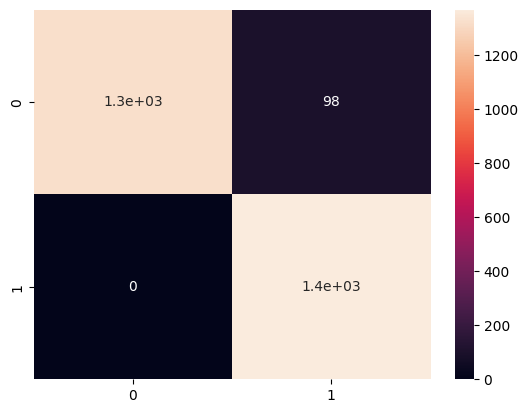

In [ ]:
mlp_classifier=MLPClassifier(hidden_layer_sizes=(200,200),activation="relu",alpha=0.01, learning_rate="constant")

m= mlp_classifier.fit(X_train,y_train)
lp= m.predict(X_test)
c= confusion_matrix(y_test,lp)
sns.heatmap(c,annot=True,cmap="rocket")
s=accuracy_score(y_test,lp)
print("Accuracy Score of MLP : ",s)

print(classification_report(y_test,lp))


In [ ]:
accuracy.append(s)

In [ ]:
accuracy

[0.9759856630824373,
 0.8523297491039427,
 0.9458781362007168,
 0.9996415770609319,
 0.9971326164874552,
 0.9756272435188293,
 0.7616487455197133,
 0.7616487455197133,
 0.9648745519713262]

In [ ]:
len(accuracy)

9

In [ ]:
algorithms=['XGBOOST','GradientBoostingClassifier', 'RandomForestClassifier','Stackedmodel1','Stackedmodel2','NEURAL NETWORKS','LogisticRegression','Support Vector Machine','Multi Layer Perceptron']

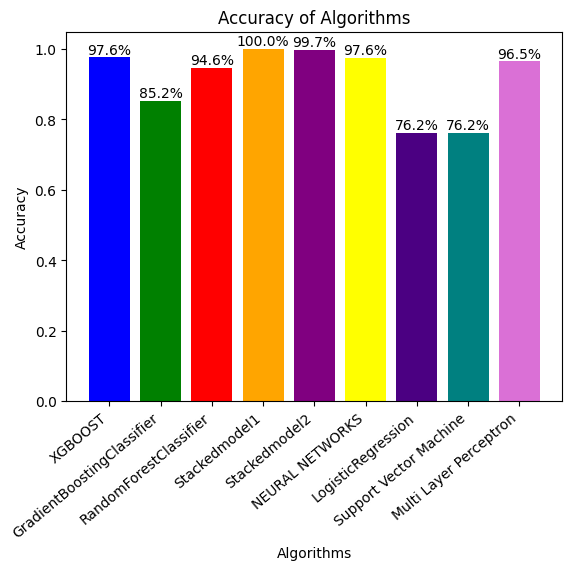

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['blue', 'green', 'red', 'orange','purple','yellow','indigo','teal','orchid']
x_pos = np.arange(len(algorithms))

fig, ax = plt.subplots()

ax.bar(x_pos, accuracy, color=colors)

for i, acc in enumerate(accuracy):
    ax.text(x_pos[i], acc + 0.01, f'{acc*100:.1f}%', ha='center')

ax.set_xticks(x_pos)
ax.set_xticklabels(algorithms, rotation=40, ha='right')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Algorithms')

plt.show()